# The MNIST dataset
The MNIST dataset is a built-in dataset provided by Keras. It consists of 70,000 28x28 grayscale images, each of which displays a single handwritten digit from 0 to 9. The training set consists of 60,000 images, while the test set has 10,000 images.

In [1]:
from tensorflow.keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


It returns two tuples with NumPy arrays. The tuples are in the form (X_train, y_train), (X_test, y_test).

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Grayscale image representation as NumPy arrays

The (60000, 28, 28) means the train image set contains 60,000 images of 28 x 28 px. In other words, it is an array containing 60,000 matrices of 28 x 28 integer values.

In a grayscale image where there is only one channel, a pixel value has just a single number ranging from 0 to 255 (both inclusive). The pixel value 0 represents black and the pixel value 255 represents white.

In [3]:
print("Training dataset dimension " , x_train.shape)

Training dataset dimension  (60000, 28, 28)


<b>The data type of pixel values is “uint8” which denotes 8-bit integers.</b>

In [4]:
x_train.dtype

dtype('uint8')

In [5]:
x_train[0] #28*28 matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Getting a single image from the training and testing set

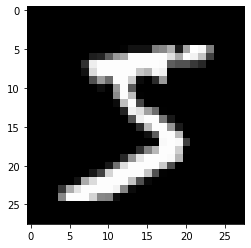

In [6]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In [7]:
y_train[0]

5

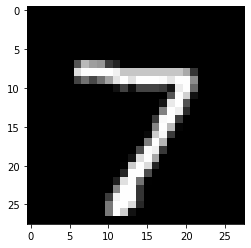

In [8]:
import matplotlib.pyplot as plt

image = x_test[0]
plt.imshow(image, cmap='gray')

<b>The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1)..<b>

In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [10]:
x_train[0] #single dimensional array of 784 values

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

To build a model it is important to convert all the values from 0 to 255 for every pixel to a range of values from 0 to 1. The simplest way is to divide the value of every pixel by 255 to get the values in the range of 0 to 1.

In [11]:
x_train = x_train / 255
x_test = x_test / 255 

Next, we transform each of the target labels for a given sample into an array of 1s and 0s where the index of the number 1 indicates the digit the the image represents. We do this because otherwise our model would interpret the digit 9 as having a higher priority than the number 3.

In [12]:
type(y_train)
type(y_test)

numpy.ndarray

In [13]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Creating the Model
With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several layers and will be comprised of 3 main parts:

1.An input layer, which will receive data in some expected format<br>
2.Several hidden layers, each comprised of many neurons. Each neuron will have the ability to affect the network's guess with its weights, which are values that will be updated over many iterations as the network gets feedback on its performance and learns<br>
3.An output layer, which will depict the network's guess for a given image<br>

<b>we will create our CNN model </b>

A CNN model generally consists of convolutional and pooling layers.The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model.

In [24]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# Train the model

The model.fit() function of Keras will start the training of the model. It takes the training data, validation data, epochs, and batch size.

In [25]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.2279 - accuracy: 0.9281 - val_loss: 0.0554 - val_accuracy: 0.9810
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0739 - accuracy: 0.9783 - val_loss: 0.0421 - val_accuracy: 0.9868
Epoch 3/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0373 - val_accuracy: 0.9874
Epoch 4/10
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0318 - val_accuracy: 0.9892
Epoch 5/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0368 - accuracy: 0.9890 - val_loss: 0.0316 - val_accuracy: 0.9890
Epoch 6/10
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0280 - val_accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 126s

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028081870530353627
Test accuracy: 0.9905999898910522
